In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# PCA
#### What could we use PCA for in the MovieLens Data 
- ...
- ...
- ...

----

## PCA on movie Genres
Follow the steps of the PCA encounter to apply a PCA on the movie genres

In [2]:
movies = pd.read_csv('../data/movies_genres.csv', index_col='movieid')

In [3]:
movies.head()

title    year  romance  sci-fi  animation  \
movieid                                                                    
1                          Toy Story  1995.0        0       0          1   
2                            Jumanji  1995.0        0       0          0   
3                   Grumpier Old Men  1995.0        1       0          0   
4                  Waiting to Exhale  1995.0        1       0          0   
5        Father of the Bride Part II  1995.0        0       0          0   

         film-noir  musical  adventure  thriller  horror  ...  fantasy  \
movieid                                                   ...            
1                0        0          1         0       0  ...        1   
2                0        0          1         0       0  ...        1   
3                0        0          0         0       0  ...        0   
4                0        0          0         0       0  ...        0   
5                0        0          0         0       0  ...        0   

         mystery  children  comedy  crime  western  imax  war  drama  action  
movieid                                                                       
1              0         1       1      0        0     0    0      0       0  
2              0         1       0      0        0     0    0      0       0  
3              0         0       1      0        0     0    0      0       0  
4              0         0       1      0        0     0    0      1       0  
5              0         0       1      0        0     0    0      0       0  

[5 rows x 21 columns]

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieid      9742 non-null   int64  
 1   title        9729 non-null   object 
 2   year         9729 non-null   float64
 3   romance      9742 non-null   int64  
 4   sci-fi       9742 non-null   int64  
 5   animation    9742 non-null   int64  
 6   film-noir    9742 non-null   int64  
 7   musical      9742 non-null   int64  
 8   adventure    9742 non-null   int64  
 9   thriller     9742 non-null   int64  
 10  horror       9742 non-null   int64  
 11  documentary  9742 non-null   int64  
 12  fantasy      9742 non-null   int64  
 13  mystery      9742 non-null   int64  
 14  children     9742 non-null   int64  
 15  comedy       9742 non-null   int64  
 16  crime        9742 non-null   int64  
 17  western      9742 non-null   int64  
 18  imax         9742 non-null   int64  
 19  war   

In [5]:
movies.columns

Index(['movieid', 'title', 'year', 'romance', 'sci-fi', 'animation',
       'film-noir', 'musical', 'adventure', 'thriller', 'horror',
       'documentary', 'fantasy', 'mystery', 'children', 'comedy', 'crime',
       'western', 'imax', 'war', 'drama', 'action'],
      dtype='object')

In [6]:
movies.set_index('movieid',inplace=True)

In [7]:
movies.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='movieid', length=9742)

In [8]:
movies.shape

(9742, 21)

In [9]:
movies.head(5)

title    year  romance  sci-fi  animation  \
movieid                                                                    
1                          Toy Story  1995.0        0       0          1   
2                            Jumanji  1995.0        0       0          0   
3                   Grumpier Old Men  1995.0        1       0          0   
4                  Waiting to Exhale  1995.0        1       0          0   
5        Father of the Bride Part II  1995.0        0       0          0   

         film-noir  musical  adventure  thriller  horror  ...  fantasy  \
movieid                                                   ...            
1                0        0          1         0       0  ...        1   
2                0        0          1         0       0  ...        1   
3                0        0          0         0       0  ...        0   
4                0        0          0         0       0  ...        0   
5                0        0          0         0       0  ...        0   

         mystery  children  comedy  crime  western  imax  war  drama  action  
movieid                                                                       
1              0         1       1      0        0     0    0      0       0  
2              0         1       0      0        0     0    0      0       0  
3              0         0       1      0        0     0    0      0       0  
4              0         0       1      0        0     0    0      1       0  
5              0         0       1      0        0     0    0      0       0  

[5 rows x 21 columns]

### 1. Scale your features
It is VERY IMPORTANT to scale your input features for the PCA, so that the algorithm doesn't think one variable is more important just because its units are bigger.

In [10]:
# skip the scaling, because the feature is 0,1

In [11]:
#sns.pairplot(movies)

### 2. PCA with sklearn
- n_components: how many components to return after the transformation, default = all. Can also be expressed as percentage of variance to retain e.g. 0.80 to explain at least 85% of the variance in the data

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()

In [14]:
m_pca = pca.fit_transform(movies.drop(['title','year'], axis = 1))

#### Variance explained by each of the components

In [15]:
m_pca.shape # new dataset, with pca-components as features

(9742, 19)

In [16]:
pca.components_.shape

(19, 19)

In [17]:
pd.DataFrame(np.round(pca.components_,2), columns=[i for i in range(19)])

0     1     2     3     4     5     6     7     8     9     10    11  \
0   0.07 -0.01  0.08 -0.01  0.03  0.07 -0.29 -0.03  0.01  0.06 -0.08  0.11   
1  -0.32  0.23  0.07  0.00 -0.02  0.24  0.35  0.17  0.02  0.08  0.05  0.05   
2   0.04  0.14  0.20 -0.02  0.03  0.51 -0.50 -0.26 -0.00  0.23 -0.14  0.21   
3   0.18 -0.04 -0.07  0.00 -0.04  0.14  0.19 -0.32 -0.18 -0.05 -0.01 -0.08   
4   0.88  0.18 -0.06 -0.01  0.01  0.05  0.21  0.15 -0.06  0.06  0.05 -0.10   
5   0.05 -0.20  0.29  0.02  0.06  0.35  0.41 -0.03 -0.14  0.36  0.19  0.41   
6  -0.26  0.41 -0.06 -0.03 -0.05  0.11  0.24  0.33 -0.24  0.03  0.03 -0.05   
7   0.07  0.77  0.13  0.03  0.01 -0.08 -0.22 -0.03 -0.10 -0.05  0.07  0.05   
8   0.05 -0.19  0.05 -0.01  0.00 -0.17 -0.34  0.67 -0.20  0.44 -0.00  0.02   
9   0.01  0.08  0.47 -0.01  0.13 -0.66  0.13 -0.22 -0.05  0.11 -0.01  0.35   
10 -0.09  0.13 -0.32  0.01 -0.05 -0.16  0.03 -0.35  0.16  0.74  0.19 -0.32   
11 -0.00 -0.06  0.05  0.02 -0.03  0.02 -0.21 -0.01 -0.03 -0.18  0.94  0.01   
12  0.01  0.06  0.03  0.01 -0.11 -0.02  0.02 -0.04 -0.21  0.06  0.00 -0.03   
13 -0.01  0.05 -0.69 -0.00  0.31 -0.09 -0.03 -0.04 -0.21 -0.03  0.02  0.59   
14 -0.08 -0.08  0.12  0.02  0.66  0.04 -0.03 -0.12 -0.55 -0.01 -0.02 -0.42   
15  0.03  0.10  0.05 -0.03  0.65  0.08  0.06  0.18  0.64  0.02  0.06 -0.02   
16  0.01  0.04  0.03 -0.01 -0.03 -0.01  0.02  0.03  0.10  0.03  0.01  0.03   
17  0.00 -0.04 -0.02 -0.00 -0.02 -0.03  0.00  0.01 -0.02 -0.03  0.00 -0.00   
18  0.00  0.00 -0.00  1.00  0.01  0.00 -0.00  0.02  0.03  0.00 -0.03  0.01   

      12    13    14    15    16    17    18  
0   0.70 -0.13 -0.00  0.00 -0.05 -0.60 -0.07  
1  -0.28  0.09  0.01  0.04 -0.02 -0.57  0.45  
2  -0.23 -0.29  0.01  0.05  0.06  0.19  0.25  
3   0.43  0.41 -0.01  0.01  0.02  0.26  0.59  
4  -0.14 -0.25 -0.00  0.01 -0.02 -0.15  0.05  
5   0.09  0.19 -0.02  0.01 -0.09  0.09 -0.40  
6   0.37 -0.49 -0.02  0.01  0.01  0.35  0.02  
7  -0.01  0.49 -0.03  0.02 -0.14  0.02 -0.24  
8   0.00  0.26 -0.01  0.00 -0.01  0.09  0.23  
9  -0.01 -0.23 -0.03  0.01  0.02  0.02  0.26  
10  0.02 -0.06 -0.01  0.02 -0.05 -0.04 -0.05  
11  0.01 -0.09  0.01 -0.01  0.03 -0.01  0.12  
12 -0.01  0.08  0.01 -0.02  0.95 -0.10 -0.12  
13 -0.06 -0.01  0.04 -0.01  0.03 -0.05  0.04  
14 -0.09 -0.04  0.10 -0.00 -0.07 -0.11 -0.07  
15  0.15  0.08 -0.07  0.03  0.24  0.14  0.06  
16  0.04  0.02  0.99 -0.06  0.00  0.04  0.01  
17  0.01  0.00  0.07  0.99  0.01  0.00 -0.03  
18  0.02 -0.04  0.01  0.00  0.01  0.01  0.02

In [18]:
pca.explained_variance_ratio_

array([0.19114012, 0.16388595, 0.09998901, 0.0853231 , 0.07032192,
       0.06027131, 0.05514299, 0.0409169 , 0.03925734, 0.03569256,
       0.03232829, 0.0275157 , 0.02033983, 0.0192777 , 0.01824052,
       0.017309  , 0.00943879, 0.00870927, 0.00489971])

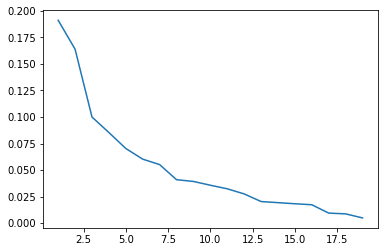

In [19]:
x = np.arange(1,20)
plt.plot(x,pca.explained_variance_ratio_)

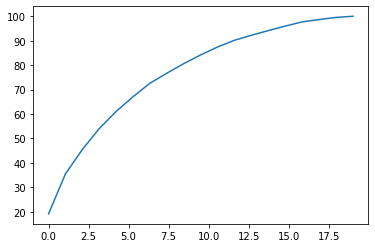

In [20]:
x = np.linspace(0,19,19)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_*100))

#### Plot in 2D

In [21]:
m_pca.shape

(9742, 19)

In [22]:
m_pca[:,0] # pc1

array([ 1.07239752,  0.29466238,  0.82594084, ..., -0.54402065,
        0.0720776 ,  0.75623436])

In [23]:
m_pca[:,1] #pc2

array([ 0.31805779,  0.52972112, -0.43446627, ..., -0.4085315 ,
        0.67973277, -0.11883799])

In [24]:
from mpl_toolkits.mplot3d import Axes3D

/Users/lilycheng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


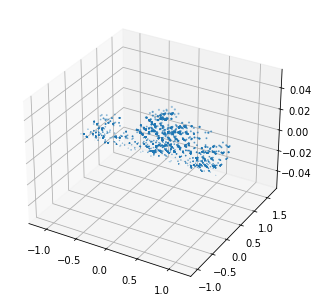

In [25]:
fig = plt.figure()
ax3d = Axes3D(fig)
plt.scatter(m_pca[:,0], m_pca[:,1],m_pca[:,1])

#### Biplot
- No inherent biplot function in scikit PCA, but plenty of implementations out there, like this one: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

- Another options is the pca package (!pip install pca)

In [26]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'b', alpha = 0.5)
    #plt.scatter(xs,ys, c = 'b', alpha = 0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

Text(0.5, 1.0, 'Biplot of PCA with moive type')

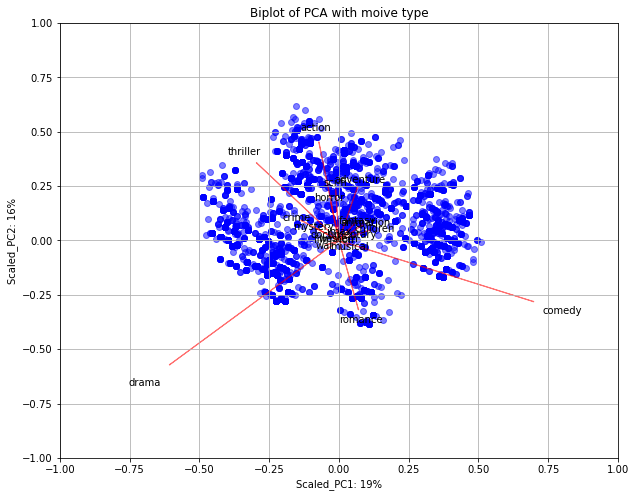

In [28]:

plt.figure(figsize = (10, 8))
#Call the function with the first two PC
biplot(m_pca[:,0:2],np.transpose(pca.components_[0:2, :]), labels = movies.drop(['title','year'], axis = 1).columns)
plt.xlabel("Scaled_PC1: "+f'{pca.explained_variance_ratio_[0]*100:.0f}'+"%")
plt.ylabel("Scaled_PC2: "+f'{pca.explained_variance_ratio_[1]*100:.0f}'+"%")
plt.title("Biplot of PCA with moive type")

### 3. Plot in 2D to visualize the distribution of genres

In [29]:
movies['pca1'] = m_pca[:,0]
movies['pca2'] = m_pca[:,1]

In [30]:
movies.head()

title    year  romance  sci-fi  animation  \
movieid                                                                    
1                          Toy Story  1995.0        0       0          1   
2                            Jumanji  1995.0        0       0          0   
3                   Grumpier Old Men  1995.0        1       0          0   
4                  Waiting to Exhale  1995.0        1       0          0   
5        Father of the Bride Part II  1995.0        0       0          0   

         film-noir  musical  adventure  thriller  horror  ...  children  \
movieid                                                   ...             
1                0        0          1         0       0  ...         1   
2                0        0          1         0       0  ...         1   
3                0        0          0         0       0  ...         0   
4                0        0          0         0       0  ...         0   
5                0        0          0         0       0  ...         0   

         comedy  crime  western  imax  war  drama  action      pca1      pca2  
movieid                                                                        
1             1      0        0     0    0      0       0  1.072398  0.318058  
2             0      0        0     0    0      0       0  0.294662  0.529721  
3             1      0        0     0    0      0       0  0.825941 -0.434466  
4             1      0        0     0    0      1       0  0.221074 -1.004426  
5             1      0        0     0    0      0       0  0.756234 -0.118838  

[5 rows x 23 columns]

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

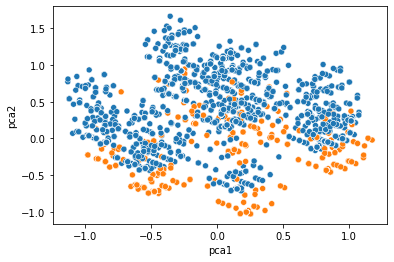

In [31]:
sns.scatterplot(data = movies, x = 'pca1', y = 'pca2', hue = 'romance', legend = False)

In [32]:
m_pca[:,0:2].shape

(9742, 2)

In [33]:
type_of_moive = movies.drop(['title','year'], axis = 1).columns[0:20]

In [34]:
type_of_moive

Index(['romance', 'sci-fi', 'animation', 'film-noir', 'musical', 'adventure',
       'thriller', 'horror', 'documentary', 'fantasy', 'mystery', 'children',
       'comedy', 'crime', 'western', 'imax', 'war', 'drama', 'action', 'pca1'],
      dtype='object')

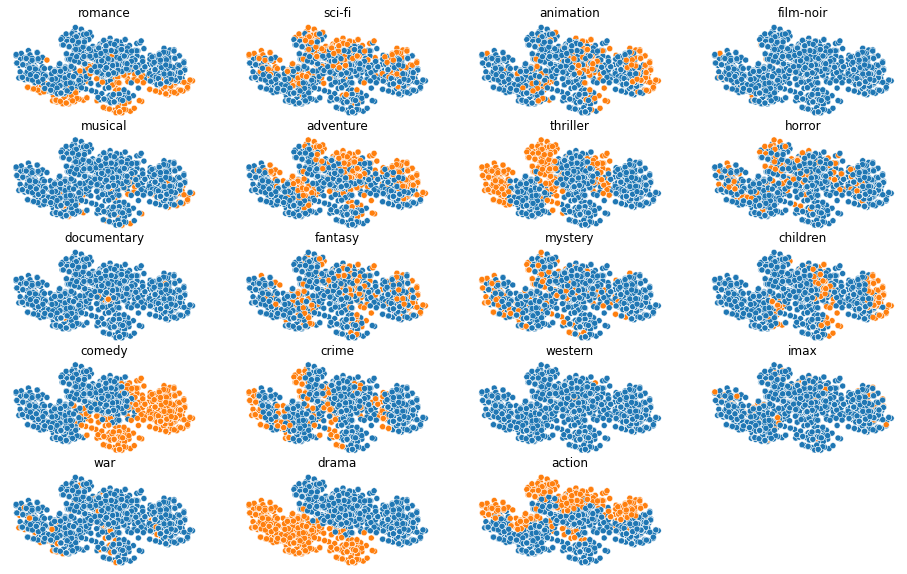

In [35]:
plt.figure(figsize= (16,10))
for i, g in zip(np.arange(1,len(type_of_moive)+1), movies.drop(['title','year'], axis = 1).columns[0:19]):
    plt.subplot(5,4,i)
    sns.scatterplot(
        data = movies.drop(['title','year'], axis = 1), x = 'pca1', y = 'pca2',
                    hue = g,  
                    legend = False
                   )
    sns.despine()
    plt.title(g)
    plt.axis('off')
    

In [36]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'ineria')

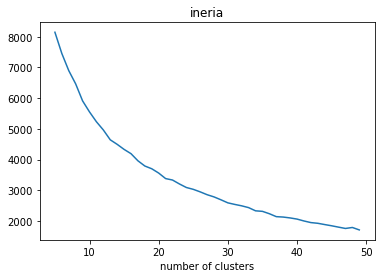

In [39]:
ineria = [] # smaller and better
silhoutte = [] # around 1 is better

for cluster_no in range(5,50):
    clustering = KMeans(n_clusters=cluster_no)
    clustering.fit(m_pca[:,0:10])
    ineria.append(clustering.inertia_)
    silhoutte.append(silhouette_score(m_pca[:,0:10], clustering.labels_))

Text(0.5, 1.0, 'ineria')

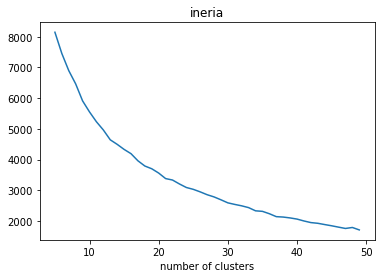

In [42]:
clusters = np.arange(5,50)
plt.plot(clusters,ineria)
plt.xlabel('number of clusters')
plt.title('ineria')

Text(0.5, 1.0, 'silhoutte')

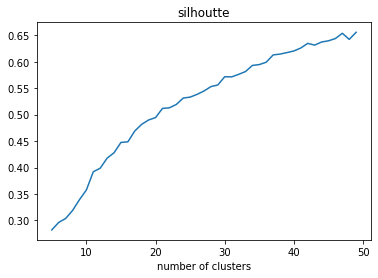

In [40]:
clusters = np.arange(5,50)
plt.plot(clusters,silhoutte)
plt.xlabel('number of clusters')
plt.title('silhoutte')

In [48]:
# decided to take 22
clustering = KMeans(n_clusters = 22)
clustering.fit(m_pca[:,0:10])

KMeans(n_clusters=22)

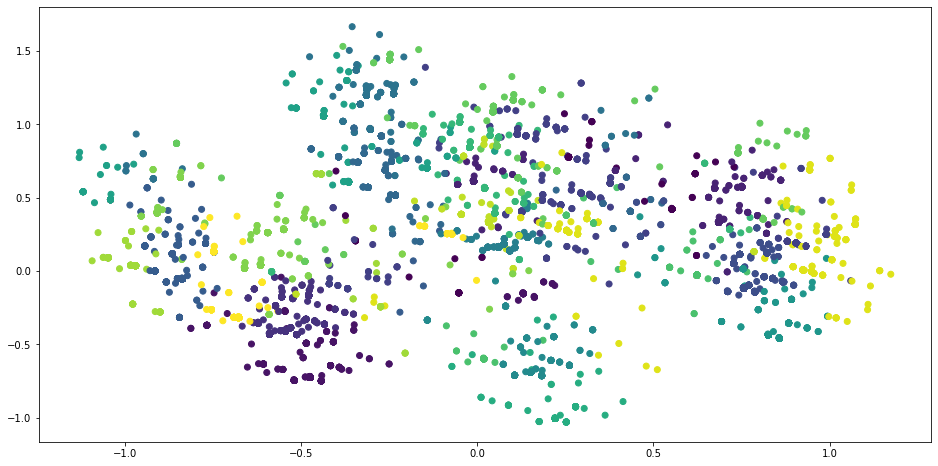

In [49]:
plt.figure(figsize=(16,8))
plt.scatter(m_pca[:,0],m_pca[:,1], c = clustering.labels_)

In [42]:
## goal is to visualize dimentions in 2D --> t-sne

In [62]:
from sklearn.manifold import TSNE

In [63]:
tsne = TSNE(
    n_components=2,  # to visulize it in 2d
    perplexity=30.0
) 

In [64]:
T = tsne.fit_transform(m_pca[:,0:10])

In [65]:
movies['tsne_1'] = T[:,0]
movies['tsne_2'] = T[:,1]

In [66]:
movies['cluster_no'] = clustering.labels_

In [67]:
movies['cluster_no']=movies['cluster_no'].astype(str)

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

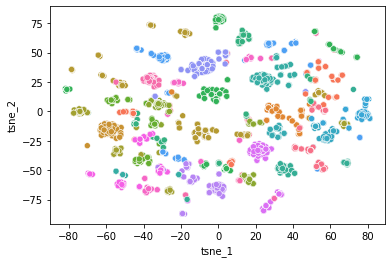

In [68]:
sns.scatterplot(data = movies, x = 'tsne_1', y = 'tsne_2', hue = 'cluster_no', legend = False)

In [69]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

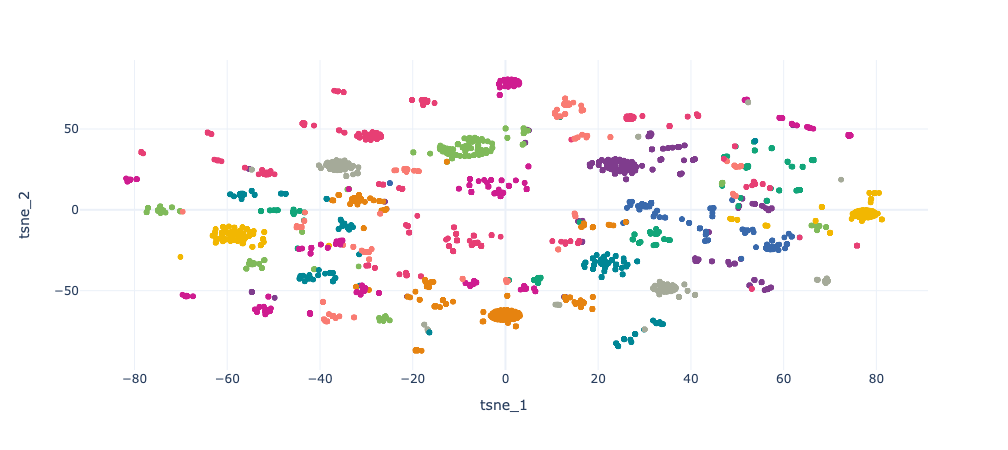

In [70]:
fig = px.scatter(
    movies,
    x = 'tsne_1', 
    y = 'tsne_2',
    color= 'cluster_no',
    hover_data=['title'],
    color_discrete_sequence=px.colors.qualitative.Bold

)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# according to clustering to recommend

### To build the "cluster based" recommender (assuming we don't have ratings yet)
- For a simple recommender: 
    - tell me a movie you like and I'll recommend a similar one based on genres
        - check if the movie is the database (if / try)
        - use fuzzy-wuzzy (https://github.com/seatgeek/fuzzywuzzy)
    - find the cluster of the movie
    - recommend 3 random movies from the same cluster


In [75]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/lilycheng/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [85]:
user_preference = str(input('Forgot movie your favorite movie name? Give me a hint!'))

Forgot movie your favorite movie name? Give me a hint! it is not about time.


In [90]:
recomend_by_name=[]
for movie_title in movies['title']:
    if fuzz.partial_ratio(user_preference, str(movie_title)) >= 80:
        recomend_by_name.append(movie_title)        

In [ ]:
recommend_more = []

In [91]:
recomend_by_name

['About Time']

In [92]:
movies.loc[movies['title']=='About Time', 'cluster_no']

movieid
104374    1
Name: cluster_no, dtype: object

In [120]:
np.random.choice(movies.loc[movies['cluster_no']=='1','title'],5)

array(["Breakfast at Tiffany's", 'Immortal Beloved',
       'Luzhin Defence, The', 'Messenger, The', 'Stanley & Iris'],
      dtype=object)

In [107]:
get_feedback=str(input('Do you like the recommendation? Yes or No?'))

Do you like the recommendation? Yes or No? no


In [117]:

def do_more_recommendation(feedback):
    more_recommendation = []
    if fuzz.partial_ratio('No', feedback) >= 99:
        more_recommendation.append(np.random.choice(movies.loc[movies['cluster_no']=='1','title'],5))
    elif fuzz.partial_ratio('Yes', get_feedback) >= 99:
        print('Enjoy the movies!')
        return more_recommendation

In [118]:
feedback = get_feedback
do_more_recommendation(feedback)

In [119]:
more_recommendation

[]